In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## Note: if you clone the gcr-catalogs repo and are running this under the `examples` folder,
## you can also use your version of GCRCatalogs:
#import sys
#sys.path.insert(0, '/path/to/your/cloned/gcr-catalogs')

## The following lines are to check if you're in the lsst group
import subprocess
assert u'lsst' in subprocess.check_output(['groups']).decode().split(), 'You need to be in the `lsst` group for this notebook to work'

import numpy as np
import pandas as pd
import pickle 
import GCRCatalogs
from GCR import GCRQuery
import healpy as hp
## check version
print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)

GCRCatalogs = 1.3.2 | GCR = 0.9.2


# Figuring out healpix nside and access

hp.ang2pix(32, ra, dec, lonlat=True, nest=False)

In [2]:
cat = GCRCatalogs.load_catalog("cosmoDC2_v1.1.4_image")

In [3]:
cat.native_filter_quantities

['redshift_block_lower', 'healpix_pixel']

In [4]:
tmp = cat.get_quantities(["ra", "dec"], native_filters=["healpix_pixel == 8786"])
data = pd.DataFrame(tmp)



In [5]:
data.shape

(17255530, 2)

In [6]:
i = 0
hp.pix2ang(512, 8786, nest=True, lonlat=True)

(38.935546875, 7.030393180830089)

In [7]:
quantities = ["galaxy_id", "ra", "dec", "redshift_true",
              "mag_g", "mag_r", "mag_i", "mag_z", "mag_u", "mag_y",
              "Mag_true_g_lsst_z0", "Mag_true_r_lsst_z0", "Mag_true_i_lsst_z0", "Mag_true_z_lsst_z0",
              "Mag_true_u_lsst_z0", "Mag_true_y_lsst_z0",
              "size_true", "size_minor_true",
              "size_disk_true", "size_minor_disk_true", "size_bulge_true", "size_minor_bulge_true",
              "ellipticity_1_true", "ellipticity_2_true",
              'shear_1', 'shear_2', 'halo_id', 'halo_mass', 'stellar_mass', 'is_central',
             ]
pixels = [8786, 8791, 9937]
for pix in pixels:
    print(pix)
    _refpixel = cat.get_quantities(quantities, native_filters=["healpix_pixel == {}".format(pix)])
    refpixel = pd.DataFrame(_refpixel)
    refpixel.to_hdf("/global/cscratch1/sd/tvarga/DC_DATA/dc2_cluster_sim_cutouts/cosmoDC2_v1.1.4_refpixel_morepars-v2-{}.h5".format(pix), key="data")

8786
8791
9937


In [7]:
i = 0
hp.ang2pix(32, data["ra"][i], data["dec"][i], lonlat=True, nest=False)

8786

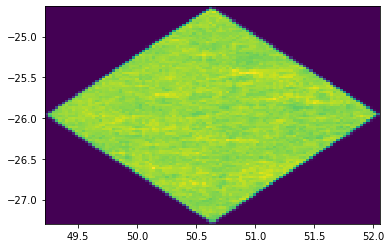

In [8]:
plt.hist2d(data["ra"], data["dec"], bins=100)
None

# Query around redmapper clusters

masking and survey edges are for the moment neglected... 

I will assume that the inner 20 Arcmin of clusters is unmasked, and not near edges

In [28]:
redcat = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_redmapper_v0.7.5')

In [29]:
allclust = pd.DataFrame(redcat.get_quantities(['cluster_id', 'ra', 'dec', "richness", "redshift"]))

In [30]:
ii = (allclust["richness"] > 30) & (allclust["richness"] < 60) & (allclust["redshift"] > 0.2) & (allclust["redshift"] < 0.35)
ii.sum()

110

In [31]:
clust = allclust[ii]

Text(0, 0.5, 'DEC')

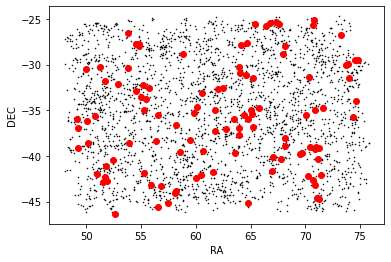

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

bins = (
    np.linspace(clust["ra"].min(), clust["ra"].max(), 100),
    np.linspace(clust["dec"].min(), clust["dec"].max(), 100),
)
#ax.hist2d(dc_pos["ra"], dc_pos["dec"], bins=bins)
ax.scatter(allclust["ra"], allclust["dec"], color="black", s=0.3)
ax.scatter(clust["ra"], clust["dec"], color="red")

ax.set_xlabel("RA")
ax.set_ylabel("DEC")

## saving cluster properties

In [33]:
"member" in "_membr_"

False

In [38]:
keys_clust = []
keys_membs = []
for key in np.sort(redcat.list_all_quantities()):
    print(key)
    if "member" in key:
        keys_membs.append(key)
    else:
        keys_clust.append(key)
clustcat = pd.DataFrame(redcat.get_quantities(keys_clust))
clustcat.to_hdf("/global/cscratch1/sd/tvarga/DC_DATA/dc2_cluster_sim_cutouts/cosmoDC2_v1.1.4_redmapper_v0.7.5_clust.h5", key="data")
membcat = pd.DataFrame(redcat.get_quantities(keys_membs))
membcat.to_hdf("/global/cscratch1/sd/tvarga/DC_DATA/dc2_cluster_sim_cutouts/cosmoDC2_v1.1.4_redmapper_v0.7.5_membs.h5", key="data")

cluster_id
cluster_id_member
dec
dec_cen_0
dec_cen_1
dec_cen_2
dec_cen_3
dec_cen_4
dec_member
id_cen_0
id_cen_1
id_cen_2
id_cen_3
id_cen_4
id_member
mag_g_lsst_member
mag_i_lsst_member
mag_r_lsst_member
mag_y_lsst_member
mag_z_lsst_member
magerr_g_lsst_member
magerr_i_lsst_member
magerr_r_lsst_member
magerr_y_lsst_member
magerr_z_lsst_member
maskfrac
p_cen_0
p_cen_1
p_cen_2
p_cen_3
p_cen_4
p_member
pfree_member
ra
ra_cen_0
ra_cen_1
ra_cen_2
ra_cen_3
ra_cen_4
ra_member
redshift
redshift_err
redshift_true_cg
redshift_true_member
refmag_err_member
refmag_member
richness
richness_err
scaleval
theta_i_member
theta_r_member


In [35]:
tmp = cat.get_quantities(["ra", "dec"], native_filters=["healpix_pixel == 7378"])
data = pd.DataFrame(tmp)

In [36]:
quantities = ["galaxy_id", "ra", "dec", "redshift_true",
              "mag_g", "mag_r", "mag_i", "mag_z",
              "Mag_true_g_lsst_z0", "Mag_true_r_lsst_z0", "Mag_true_i_lsst_z0", "Mag_true_z_lsst_z0",
              "size_true", "ellipticity_1_true", "ellipticity_2_true",
              'shear_1', 'shear_2', 'halo_id', 'halo_mass', 'stellar_mass', 'is_central',
             ]

In [37]:
nside = 32
nest = True
search_radius = 20. / 60
search_radius_rad = search_radius / 180. * np.pi # 20 arcmin in radians

available_pixels = np.array(cat.available_healpix_pixels)
for i in np.arange(len(clust)):
    ipix = hp.ang2pix(32, clust["ra"].iloc[i], clust["dec"].iloc[i], lonlat=nest, nest=nest)
    #print(i, ipix, np.where(ipix == available_pixels)[0])
    
    ivec = hp.pix2vec(nside, ipix, nest)
    pixels_to_load = hp.query_disc(nside, ivec, search_radius_rad, inclusive=True)
    print(i, pixels_to_load)
    
    cra = clust["ra"].iloc[i]
    cdec = clust["dec"].iloc[i]
    filters = [
        "ra < {}".format(cra + search_radius),
        "ra > {}".format(cra - search_radius),
        "dec < {}".format(cdec + search_radius),
        "dec > {}".format(cdec - search_radius),
    ]

    _data = []
    for pix in pixels_to_load:
        native_filter = ["healpix_pixel == {}".format(pix)]
        print(native_filter)
        tmp = cat.get_quantities(quantities, filters=filters, native_filters=native_filter)
        __data = pd.DataFrame(tmp)
        _data.append(__data)
    data = pd.concat(_data)
    print("data loaded")
    dist = np.sqrt((cra - data["ra"])**2. + (cdec - data["dec"])**2.)
    data["R"] = dist * 60.
    
    cid = clust["cluster_id"].iloc[i]
    oname = "/global/cscratch1/sd/tvarga/DC_DATA/dc2_cluster_sim_cutouts/clust-{}_dc2-sim-cutout.h5".format(cid)
    data.to_hdf(oname, key="data")
    print("saved", oname)
    
    del __data
    del _data
    del data
    #break

0 [8787]
['healpix_pixel == 8787']
data loaded
saved /global/cscratch1/sd/tvarga/DC_DATA/dc2_cluster_sim_cutouts/clust-641_dc2-sim-cutout.h5
1 [8915]
['healpix_pixel == 8915']
data loaded
saved /global/cscratch1/sd/tvarga/DC_DATA/dc2_cluster_sim_cutouts/clust-1150_dc2-sim-cutout.h5
2 [8915]
['healpix_pixel == 8915']
data loaded
saved /global/cscratch1/sd/tvarga/DC_DATA/dc2_cluster_sim_cutouts/clust-1143_dc2-sim-cutout.h5
3 [8915]
['healpix_pixel == 8915']
data loaded
saved /global/cscratch1/sd/tvarga/DC_DATA/dc2_cluster_sim_cutouts/clust-1390_dc2-sim-cutout.h5
4 [8791]
['healpix_pixel == 8791']
data loaded
saved /global/cscratch1/sd/tvarga/DC_DATA/dc2_cluster_sim_cutouts/clust-329_dc2-sim-cutout.h5
5 [8792]
['healpix_pixel == 8792']
data loaded
saved /global/cscratch1/sd/tvarga/DC_DATA/dc2_cluster_sim_cutouts/clust-360_dc2-sim-cutout.h5
6 [8792]
['healpix_pixel == 8792']
data loaded
saved /global/cscratch1/sd/tvarga/DC_DATA/dc2_cluster_sim_cutouts/clust-439_dc2-sim-cutout.h5
7 [9048]
[

In [43]:
data = pd.read_hdf(oname, key="data")

In [44]:
data

,ellipticity_2_true,halo_id,mag_i,ellipticity_1_true,mag_r,galaxy_id,Mag_true_g_lsst_z0,Mag_true_i_lsst_z0,dec,redshift_true,...,shear_2,mag_g,shear_1,is_central,ra,Mag_true_z_lsst_z0,size_true,halo_mass,mag_z,R
0,0.000021,-2000192487,20.338875,-0.004482,20.553099,12000000027,-14.035474,-14.652146,-44.525343,0.023083,...,0.000000,20.995304,-0.000000,True,71.166552,-14.726765,1.402190,1.389831e+10,20.261736,14.559459
1,-0.094434,-2900192487,20.100594,0.053795,20.426708,12000000036,-13.367792,-14.283671,-44.757367,0.017386,...,0.000000,21.044273,-0.000000,True,71.125563,-14.424246,0.618414,1.012179e+10,19.949051,10.025402
2,0.007591,-4200192487,20.004274,-0.117585,20.242916,12000000049,-14.358445,-15.011087,-44.958434,0.023272,...,0.000000,20.688377,-0.000000,True,71.522532,-15.114164,1.791463,1.276000e+10,19.896883,19.362251
3,-0.416683,-4300192487,22.033186,-0.054102,22.206839,12000000050,-12.537052,-12.977677,-44.762208,0.023335,...,0.000000,22.498556,-0.000000,True,71.166624,-13.026339,0.697124,9.397665e+09,21.979929,7.654315
4,-0.127177,-4800192487,19.242474,0.660482,19.460890,12000000055,-15.051134,-15.706758,-44.913275,0.022653,...,0.000000,19.942940,-0.000000,True,71.184111,-15.788331,2.256796,1.842684e+10,19.162350,12.538790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251653,0.006981,-63842800192121,28.981515,0.004654,28.903051,12020872166,-16.408155,-16.207497,-44.869556,3.027142,...,-0.015800,29.001743,0.005611,True,71.537293,-16.181606,0.025147,1.197975e+10,29.066419,16.879047
1251654,0.006676,-63843900192121,30.009598,0.004983,30.112170,12020872177,-16.857992,-16.870493,-44.841090,2.971157,...,-0.020671,30.895697,0.066061,True,71.316501,-16.865696,0.067174,3.347651e+10,29.995600,6.624256
1251655,-0.002693,-63845900192121,29.721847,0.001598,29.635616,12020872197,-15.406972,-15.074415,-44.976377,2.961143,...,-0.035074,29.776643,0.005090,True,71.583976,-15.002029,0.016408,9.555640e+09,29.791450,22.828192
1251656,0.003585,-63847900192121,29.634788,0.018513,29.727896,12020872217,-16.956804,-16.963013,-44.631252,3.005764,...,-0.030872,30.506471,0.004369,True,71.133337,-16.956493,0.139332,1.728564e+10,29.615343,11.279065


In [ ]:
pixel = hp.ang2pix(32, data["ra"][i], data["dec"][i], lonlat=True, nest=False)

In [ ]:
tmp = cat.get_quantities(["ra", "dec"], native_filters=["healpix_pixel == 8786"])
data = pd.DataFrame(tmp)

In [ ]:
size_true, ellipticity_1_true, ellipticity_2_true

In [39]:
np.sort(cat.list_all_quantities())

array(['A_v', 'A_v_bulge', 'A_v_disk', 'Mag_true_Y_lsst_z0',
       'Mag_true_Y_lsst_z0_no_host_extinction', 'Mag_true_g_lsst_z0',
       'Mag_true_g_lsst_z0_no_host_extinction', 'Mag_true_g_sdss_z0',
       'Mag_true_g_sdss_z0_no_host_extinction', 'Mag_true_i_lsst_z0',
       'Mag_true_i_lsst_z0_no_host_extinction', 'Mag_true_i_sdss_z0',
       'Mag_true_i_sdss_z0_no_host_extinction', 'Mag_true_r_lsst_z0',
       'Mag_true_r_lsst_z0_no_host_extinction', 'Mag_true_r_sdss_z0',
       'Mag_true_r_sdss_z0_no_host_extinction', 'Mag_true_u_lsst_z0',
       'Mag_true_u_lsst_z0_no_host_extinction', 'Mag_true_u_sdss_z0',
       'Mag_true_u_sdss_z0_no_host_extinction', 'Mag_true_y_lsst_z0',
       'Mag_true_y_lsst_z0_no_host_extinction', 'Mag_true_z_lsst_z0',
       'Mag_true_z_lsst_z0_no_host_extinction', 'Mag_true_z_sdss_z0',
       'Mag_true_z_sdss_z0_no_host_extinction', 'R_v', 'R_v_bulge',
       'R_v_disk', 'bulge_to_total_ratio_i', 'convergence', 'dec',
       'dec_true', 'ellipticity_1_

In [ ]:
sersic_bulge